In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#importing for machine learning part
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score)
from sklearn.preprocessing import (RobustScaler, QuantileTransformer)
from sklearn.pipeline import  Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression#
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import joblib
import lightgbm


In [3]:
#Suppressing all warnings
import warnings
warnings.filterwarnings('ignore')

#set display options to view all columns
pd.set_option('display.max_columns', None)

In [4]:
#Importing my data
data = pd.read_csv(r"C:\Users\Alucard\Documents\FastApiProj\data\Paitients_Files_Train.csv")

#display the data
data.head(4)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative


In [5]:
#checking for missing data
# ID: number to represent patient ID
# PRG: Plasma glucose
# PL: Blood Work Result-1 (mu U/ml)
# PR: Blood Pressure (mm Hg)
# SK: Blood Work Result-2 (mm)
# TS: Blood Work Result-3 (mu U/ml)
# M11: Body mass index (weight in kg/(height in m)^2
# BD2: Blood Work Result-4 (mu U/ml)
# Age: patients age (years)
# Insurance: If a patient holds a valid insurance card
# Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [6]:
#Chhe
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
data.shape

(599, 11)

In [9]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [10]:
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [11]:
data = data.drop(columns=['ID'])

## Univariate analysis


In [12]:
nume_col = data.select_dtypes(include=['int64','float64'])
nume_col

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,1
597,1,89,24,19,25,27.8,0.559,21,0


Column : PRG
Column : 0.91
Column : 0.29
Column : 3.82
Column : 3.0
------------------------------
Column : PL
Column : 0.12
Column : 0.76
Column : 120.15
Column : 116.0
------------------------------
Column : PR
Column : -1.87
Column : 5.26
Column : 68.73
Column : 70.0
------------------------------
Column : SK
Column : 0.16
Column : -0.31
Column : 20.56
Column : 23.0
------------------------------
Column : TS
Column : 2.4
Column : 8.09
Column : 79.46
Column : 36.0
------------------------------
Column : M11
Column : -0.41
Column : 3.26
Column : 31.92
Column : 32.0
------------------------------
Column : BD2
Column : 1.99
Column : 6.11
Column : 0.48
Column : 0.38
------------------------------
Column : Age
Column : 1.15
Column : 0.69
Column : 33.29
Column : 29.0
------------------------------
Column : Insurance
Column : -0.8
Column : -1.36
Column : 0.69
Column : 1.0
------------------------------


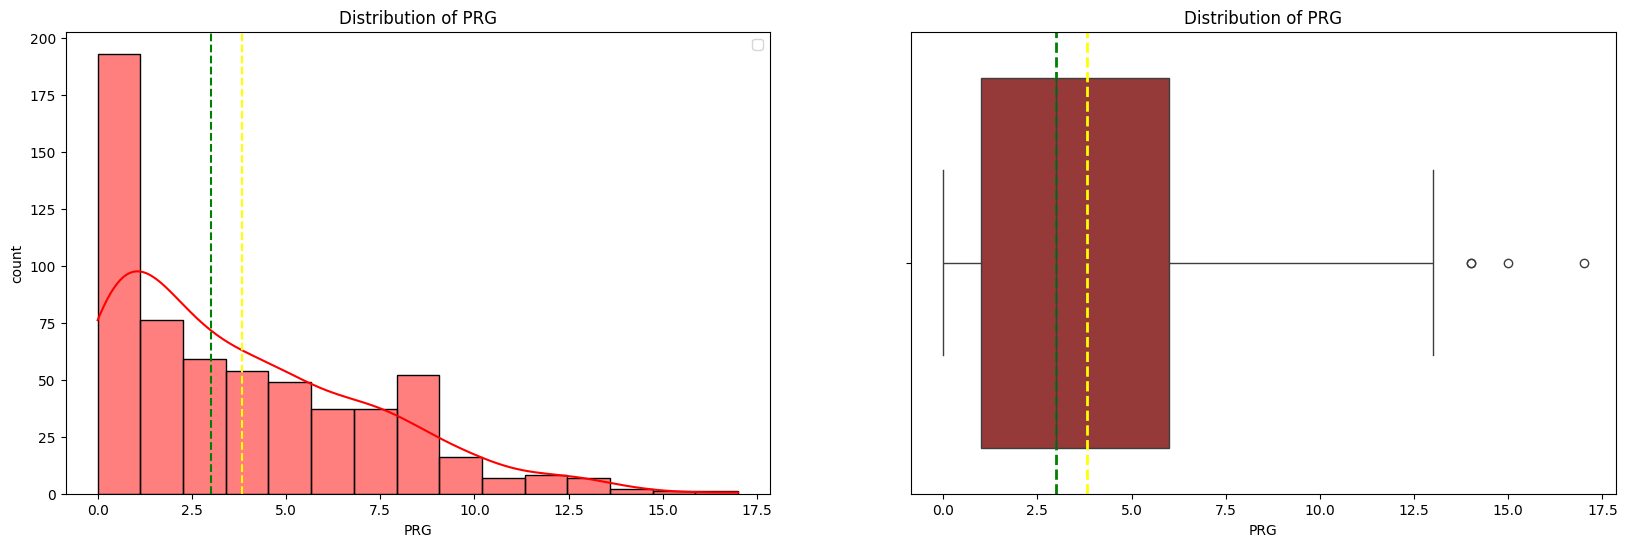

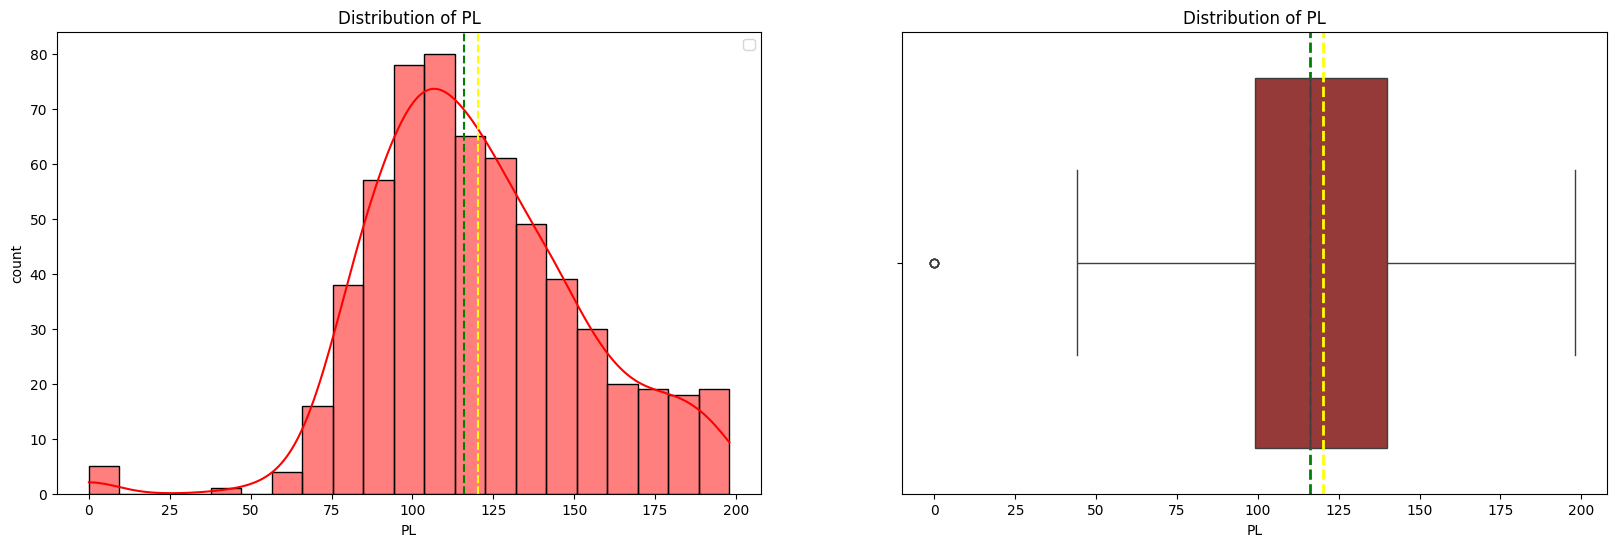

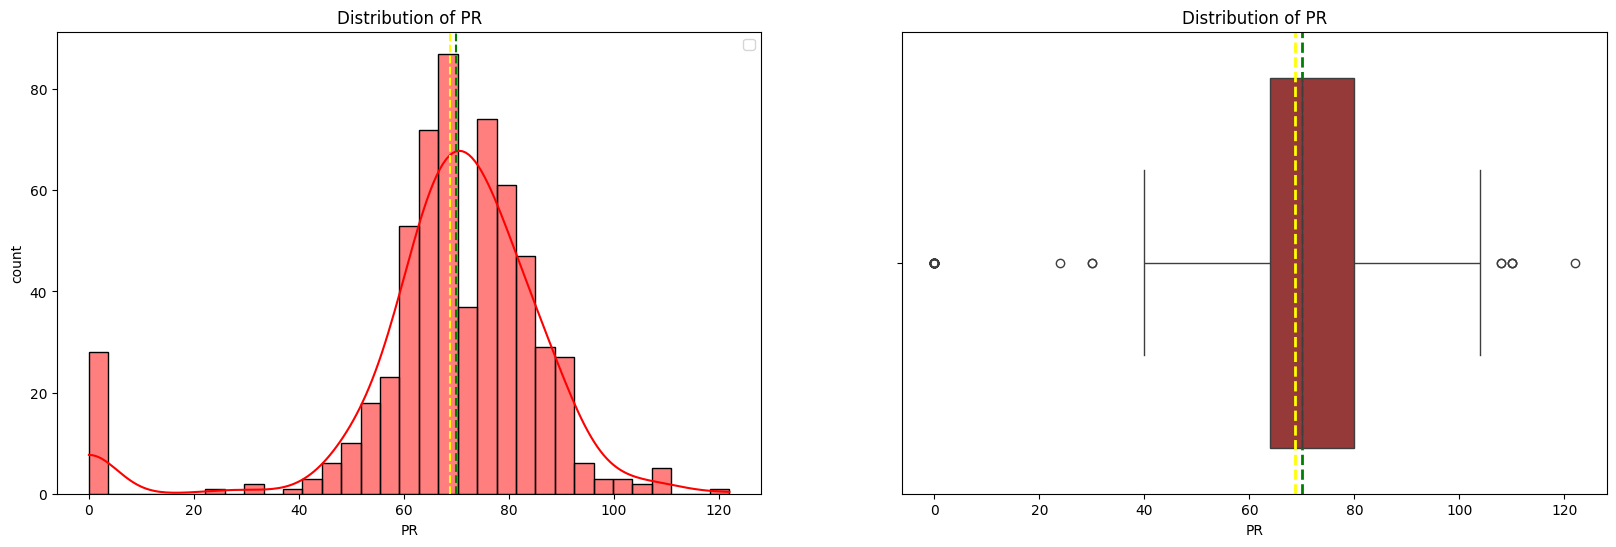

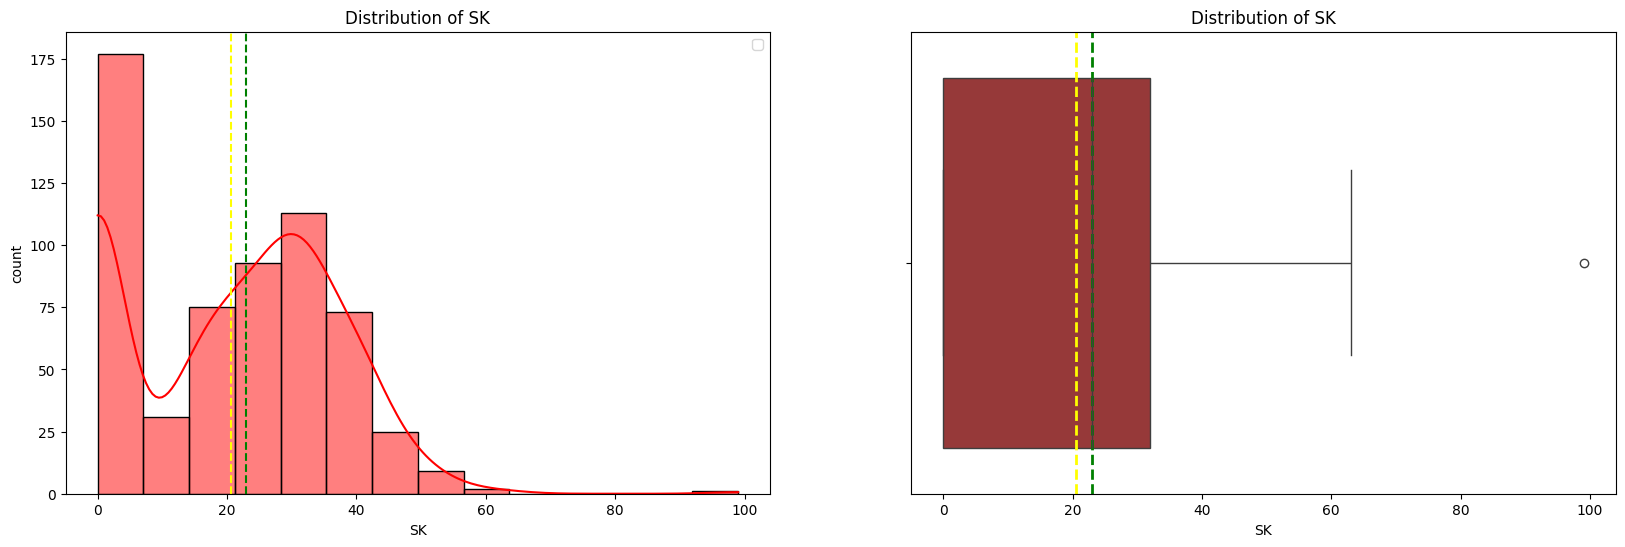

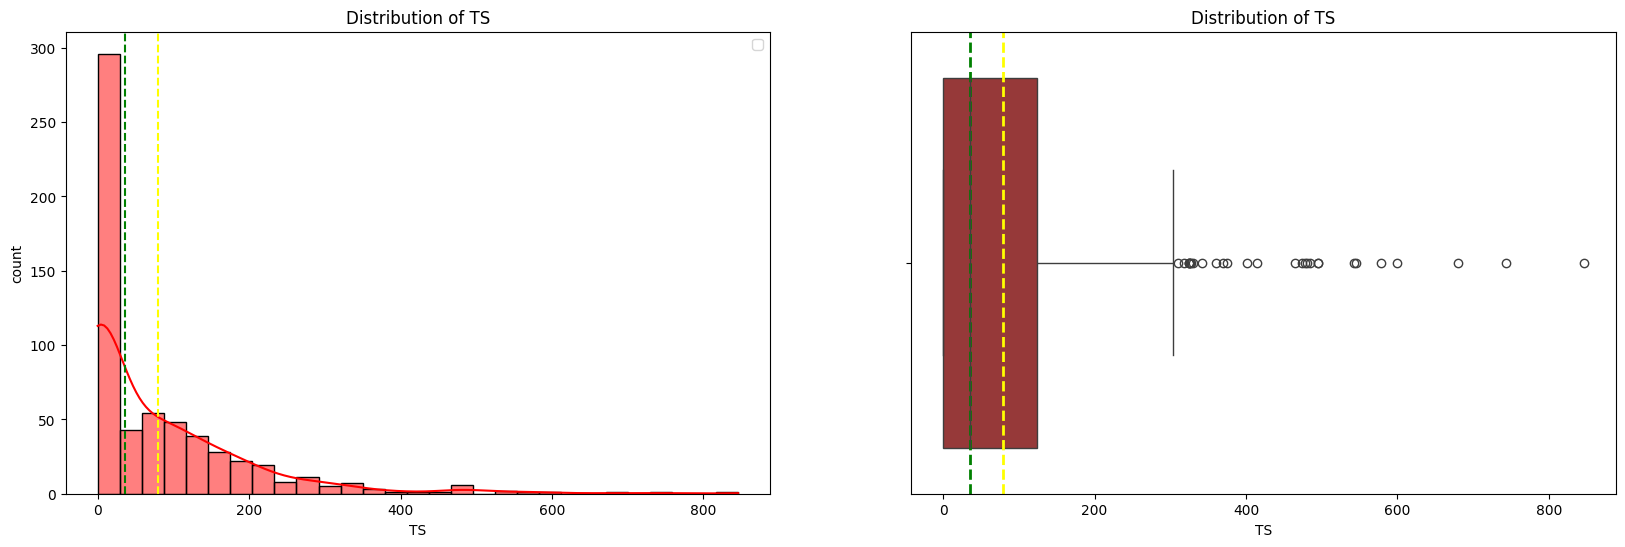

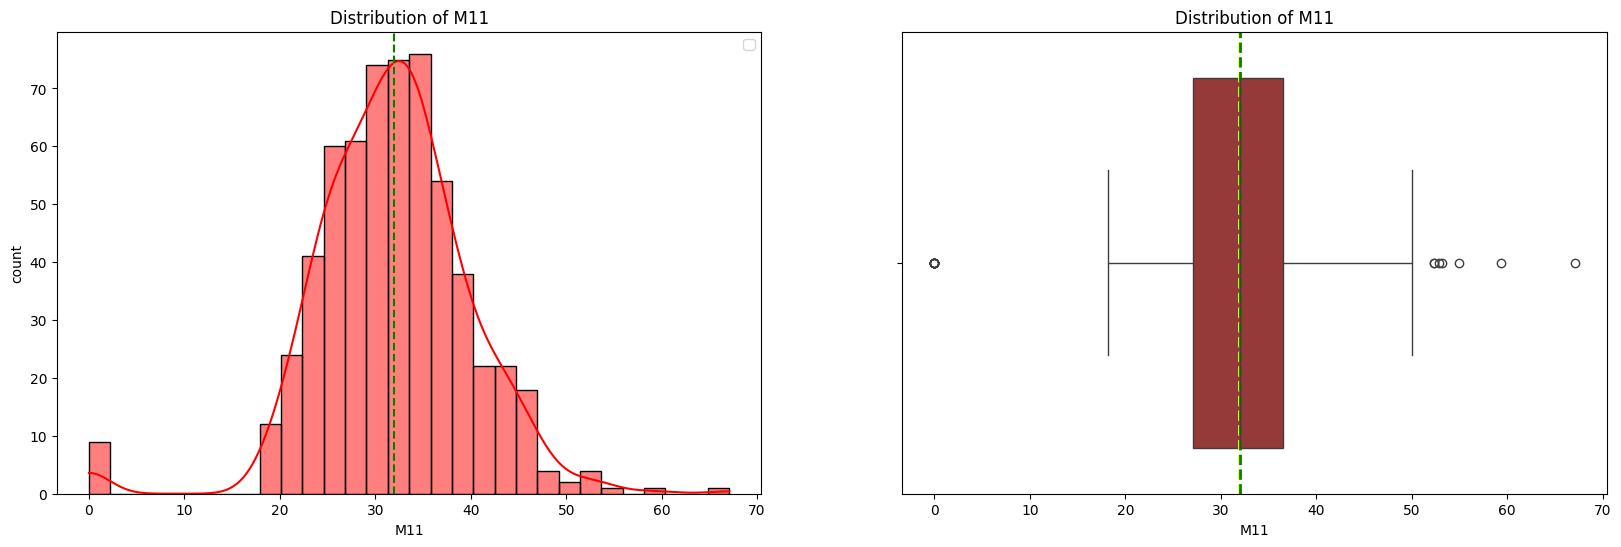

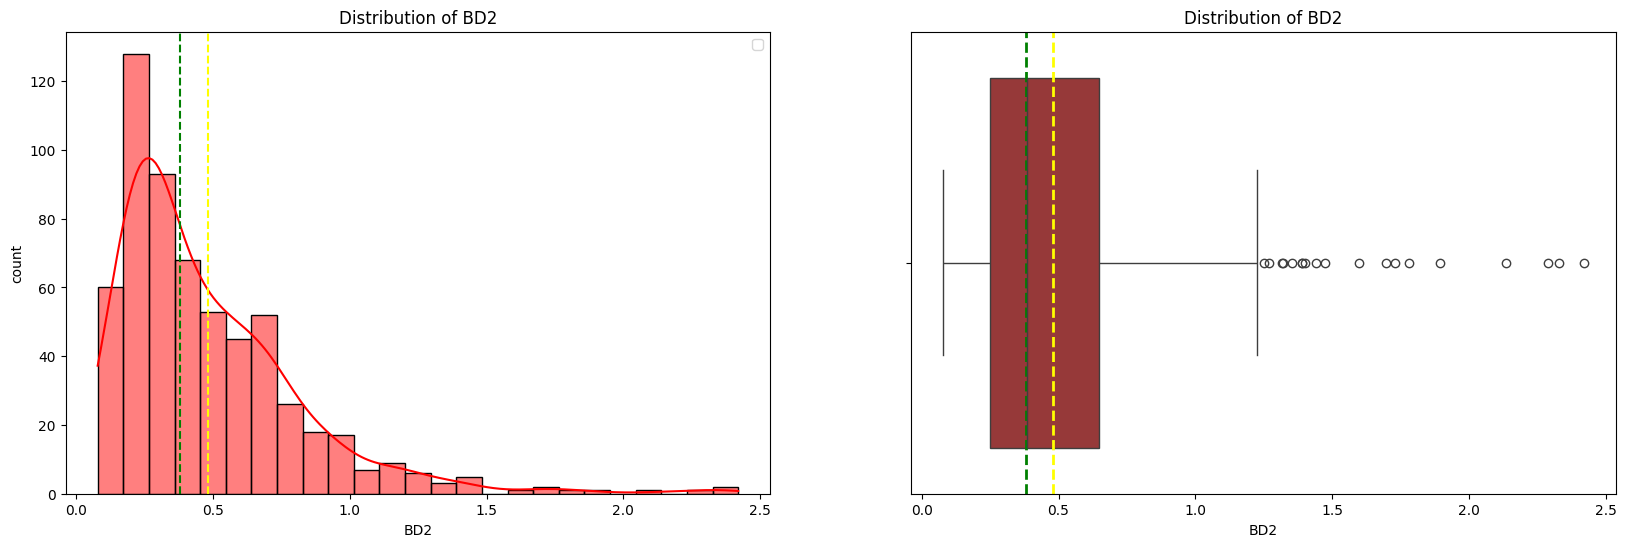

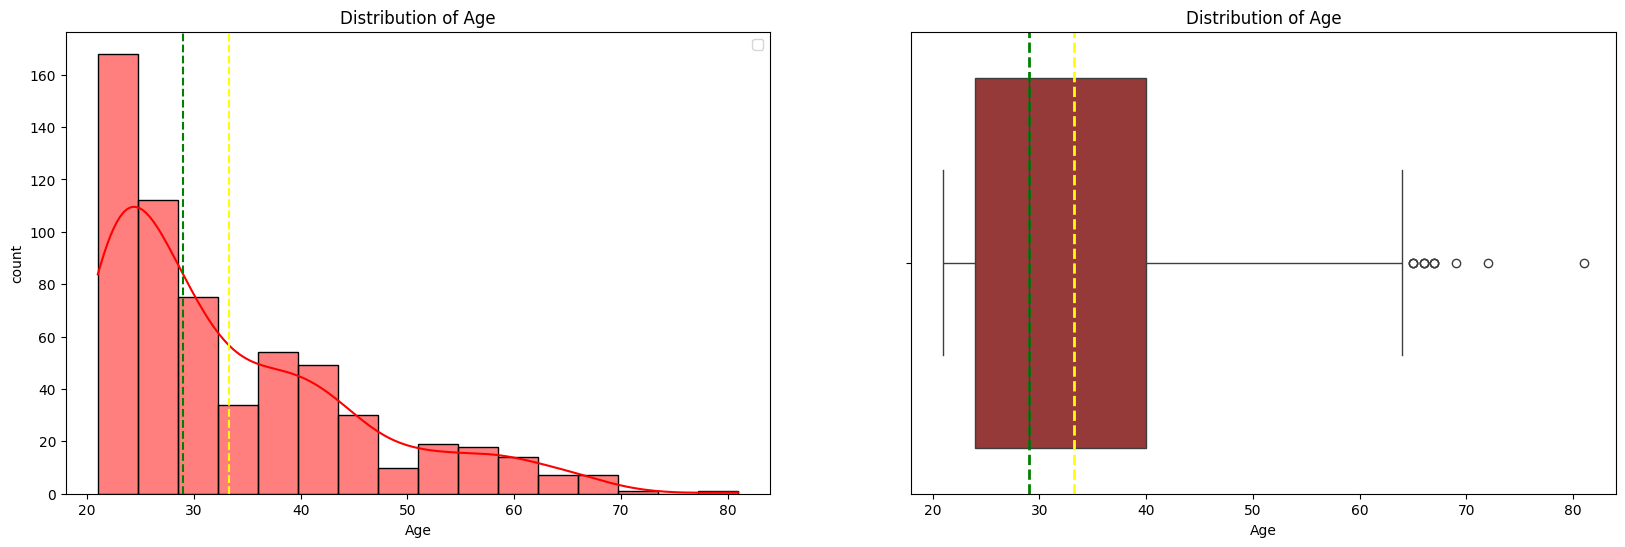

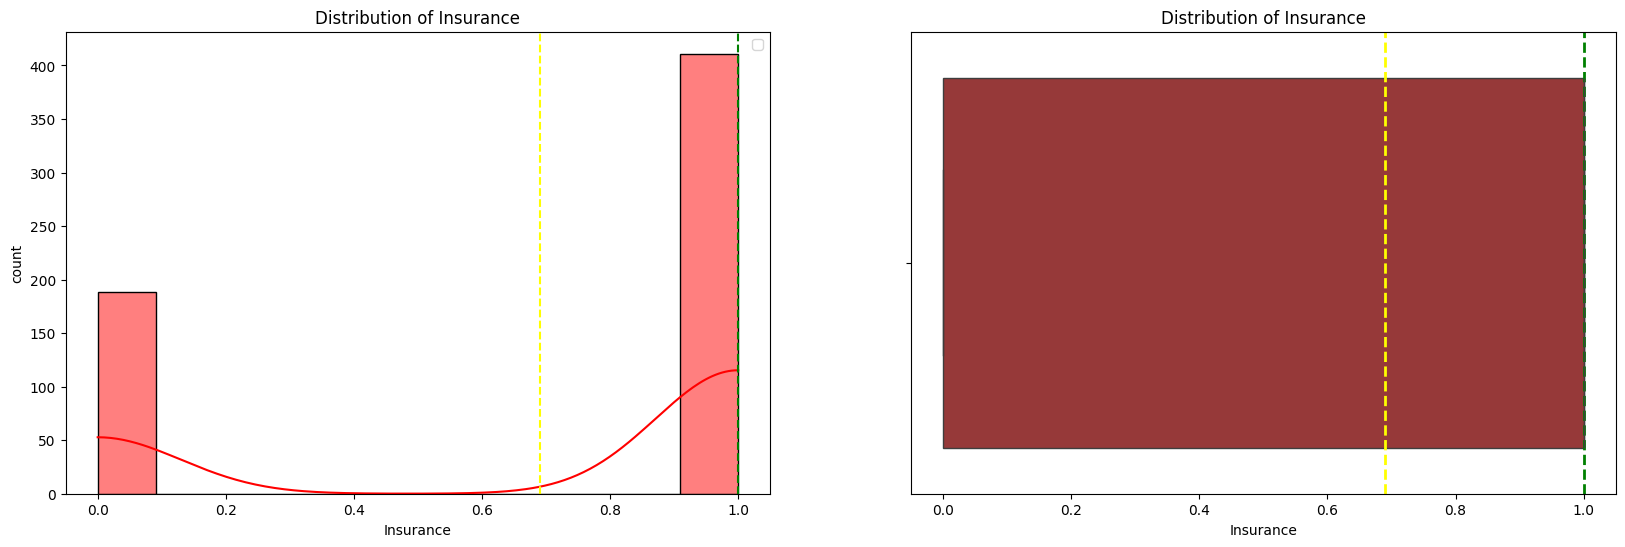

In [13]:
for col in nume_col:
   
    

    #calculating for some statistical measures
    skewness = round(nume_col[col].skew() ,2)
    kurotsis = round(nume_col[col].kurtosis(), 2)
    mean = round(nume_col[col].mean(), 2)
    median =round(nume_col[col].median(), 2) 


#print the columns and their values
    print(f"Column : {col}")
    print(f"Column : {skewness}")
    print(f"Column : {kurotsis}")
    print(f"Column : {mean}")
    print(f"Column : {median}")
    print("-" * 30)





      # Set plot size


    plt.figure(figsize=(20, 6))

    #adding the histplot
    plt.subplot(1,2,1)
    sns.histplot(nume_col[col], kde = True, color = 'red', edgecolor = 'black')
    plt.axvline(mean, color = 'yellow', linestyle = 'dashed')
    plt.axvline(median, color = 'green', linestyle = 'dashed')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.legend()



    #adding the boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x = nume_col[col], color = 'brown')
    plt.axvline(mean, color = 'yellow', linestyle = 'dashed' ,linewidth = 2)
    plt.axvline(median, color = 'green', linestyle = 'dashed', linewidth = 2)
    plt.title(f'Distribution of {col}')
    # plt.xlabel(cold)
    # plt.ylabel('count')
    # plt.legend()

## Bivariate Analysis

In [14]:
import math
def cat_vs_target(data, all, target):

  n_row = math.ceil(len(all)/3)
  fig, axes = plt.subplots(n_row, 3, figsize = (20, 6* n_row))
  axes = axes.flatten()
  for i, column in enumerate(all):
    ax = axes[i]
    sns.countplot(data = data, x= column, hue= target, ax = ax)

    ax.set_xlabel(column)
    ax.set_ylabel('count')
    ax.set_title(f'{column} vs {target}')
    ax.legend(title = 'Sepsis')
    ax.set_xticks

    

    total = len(data)
    for container in ax.containers:
      label = [f'{h.get_height()} ({h.get_height()/ total*100:.2f}%)' if h.get_height() > 0 else '' for h in container]
      ax.bar_label(container, label)

      ax.legend(title='Sepsis status', loc = 'upper left')


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [15]:
all = ['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance','Sepssis']

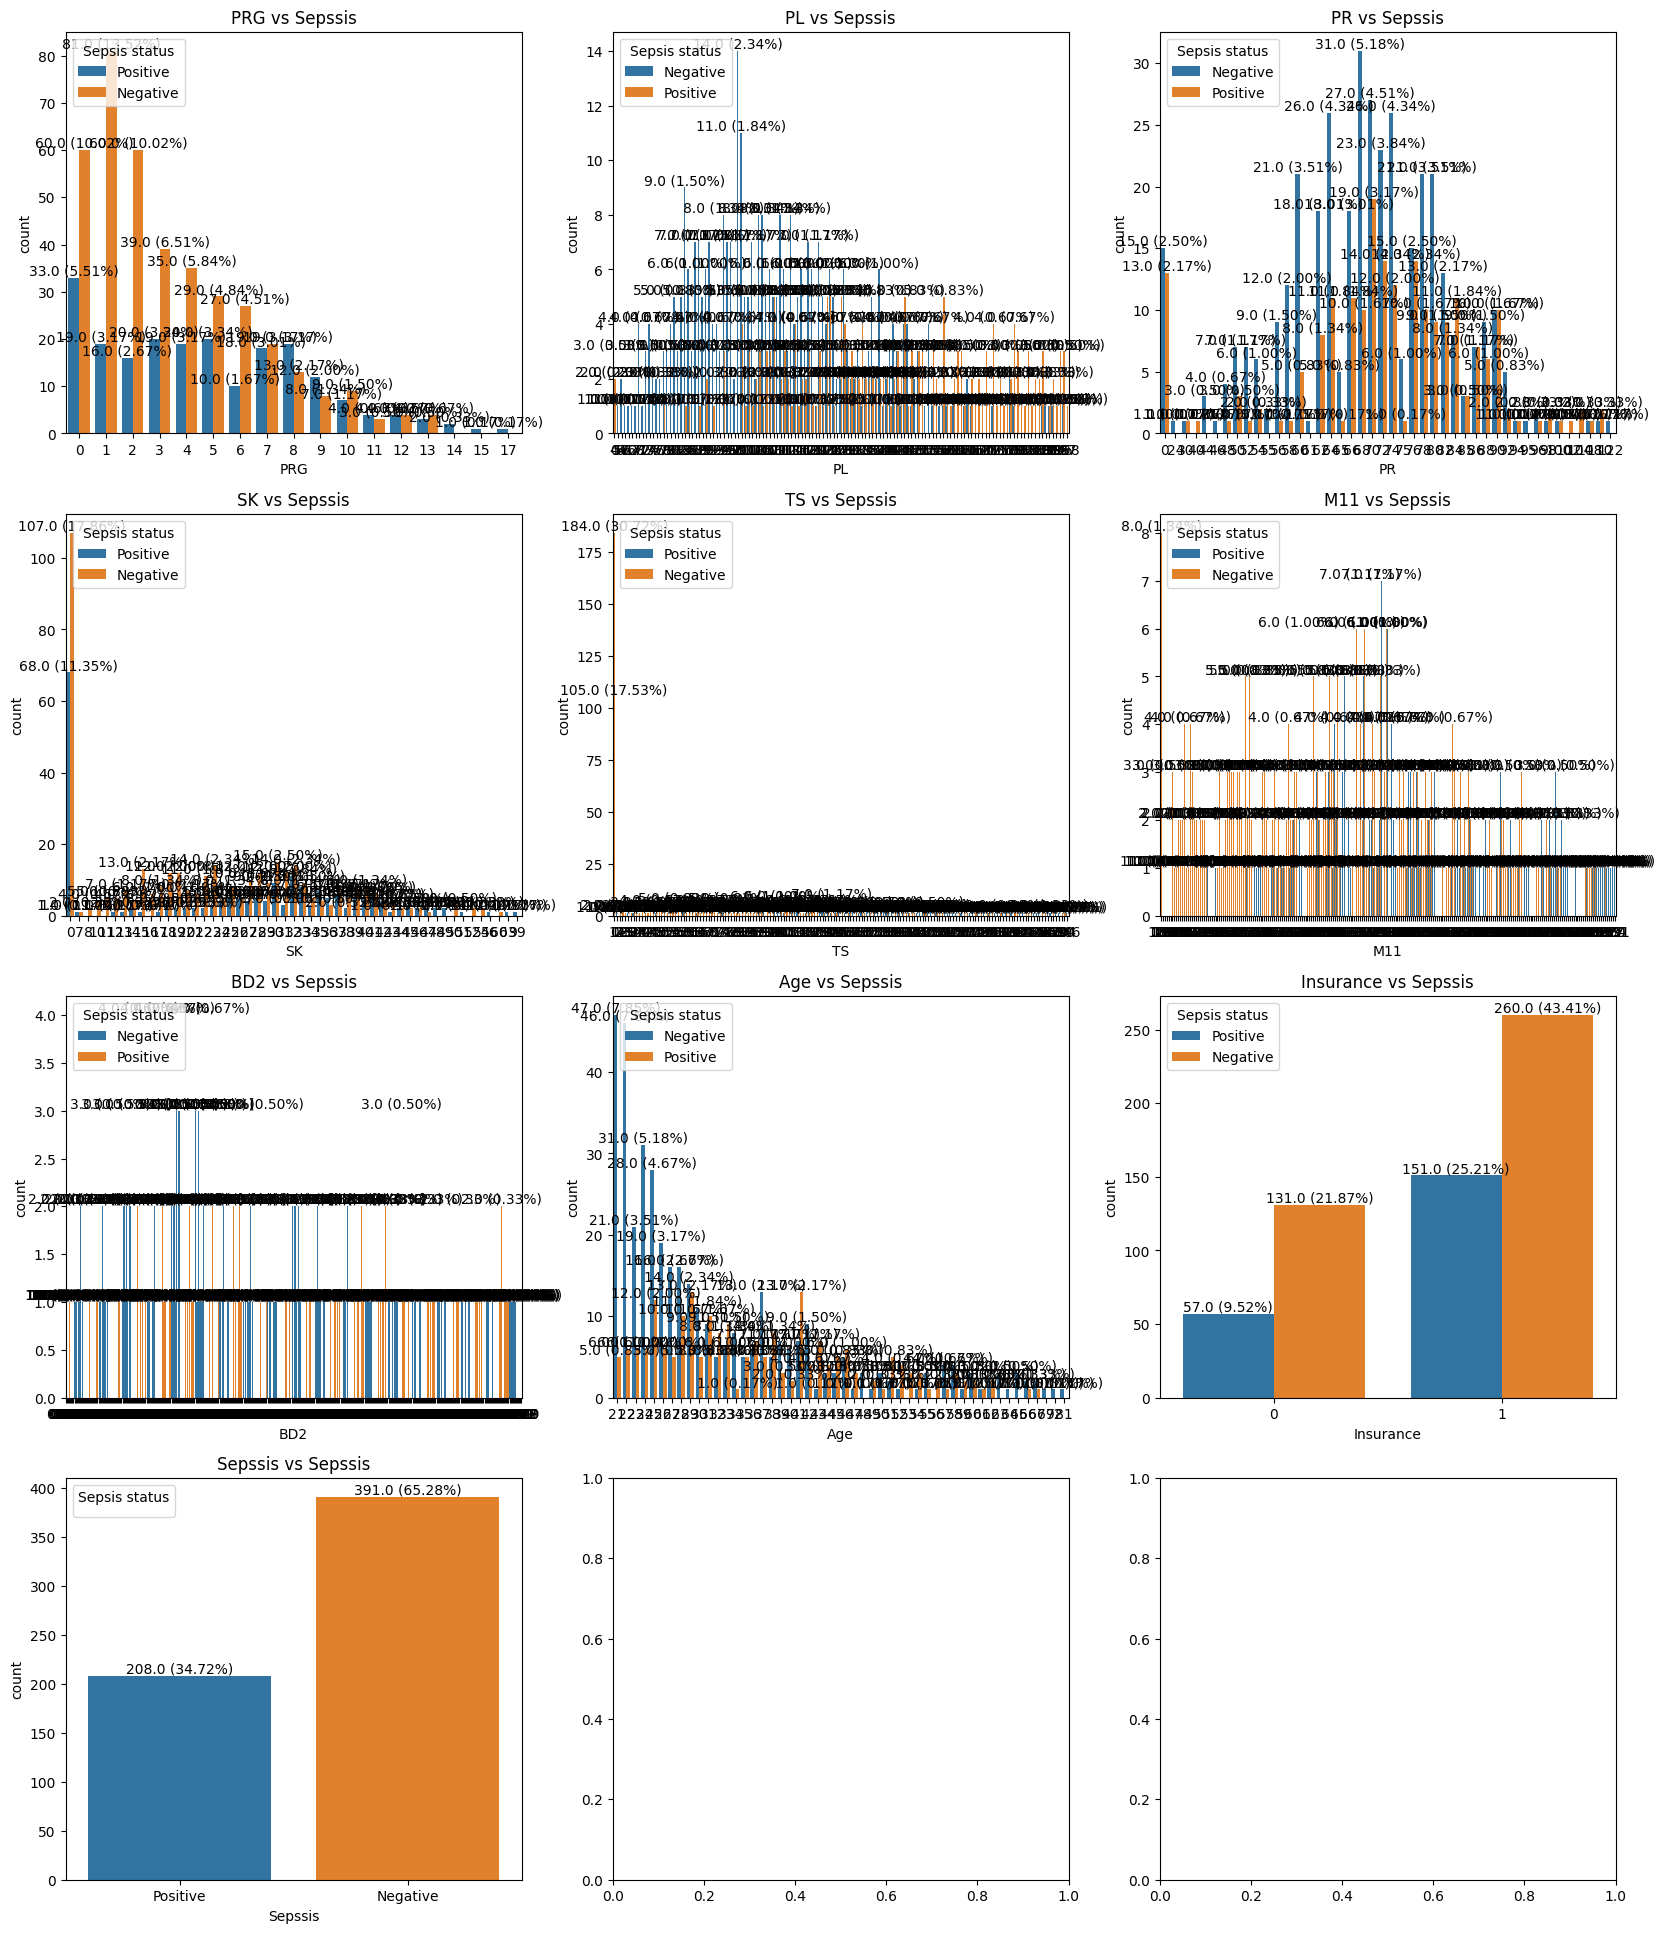

In [16]:
cat_vs_target(data,all,'Sepssis')

## multivariate analysis

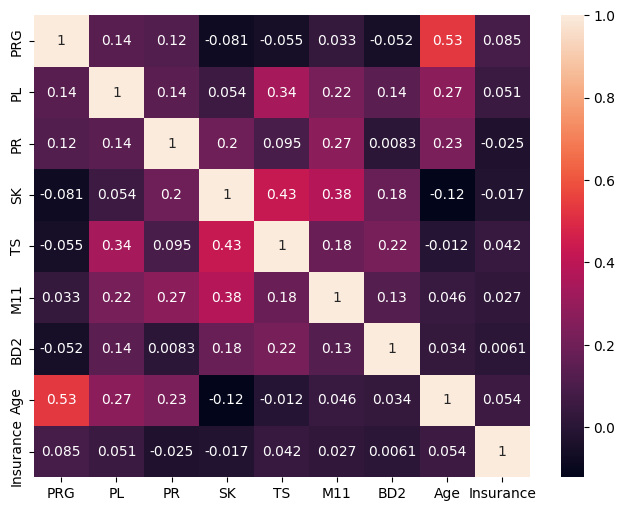

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(nume_col.corr(), annot=True)
plt.show()

## Business questions

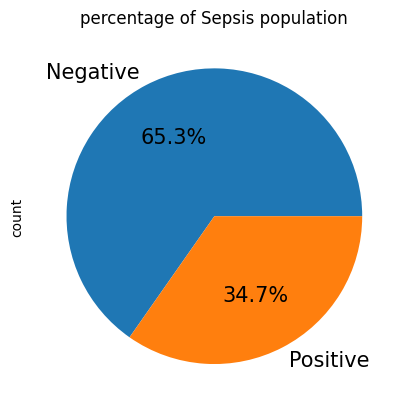

In [18]:
# 1. what percentage of patienta have sepsis and who doesn't

data['Sepssis'].value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize= 15)
plt.title('percentage of Sepsis population')
plt.show()

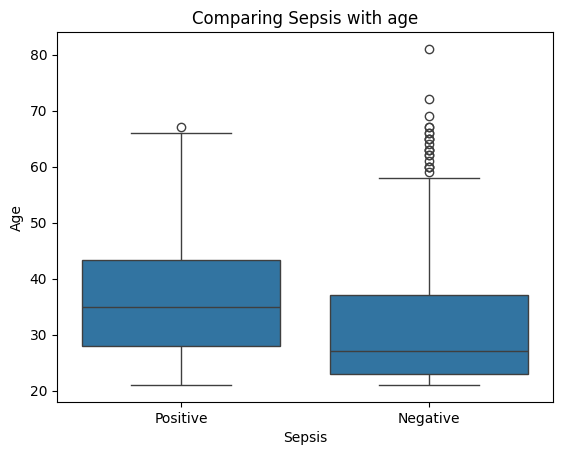

In [19]:
# 2. how does the age of the patient affect sepssis
sns.boxplot(x ='Sepssis' ,y='Age', data = data)
plt.title('Comparing Sepsis with age')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()

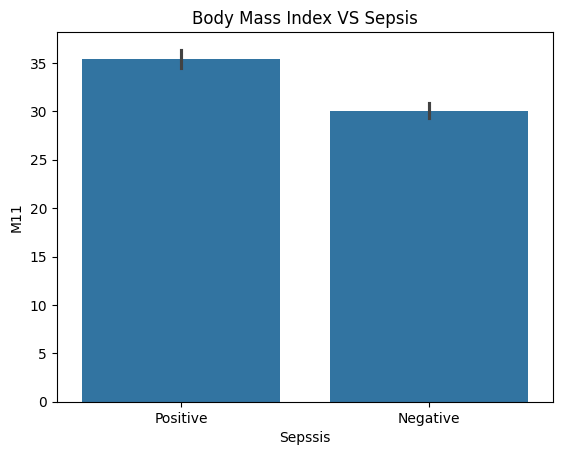

In [20]:
# 3. How does Body mass index affect Sepsis

sns.barplot(x=data['Sepssis'],y=data['M11'])
plt.title("Body Mass Index VS Sepsis")
plt.show()

[]

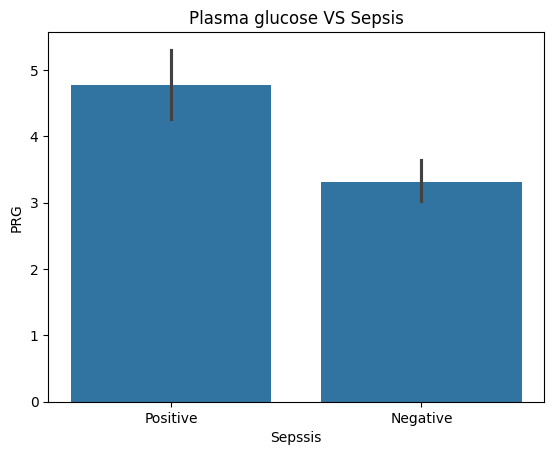

In [44]:
#does Plasma glucose of the patient affect sepsis
sns.barplot(y=data['PRG'],x=data['Sepssis'])
plt.title('Plasma glucose VS Sepsis')
plt.plot()

[]

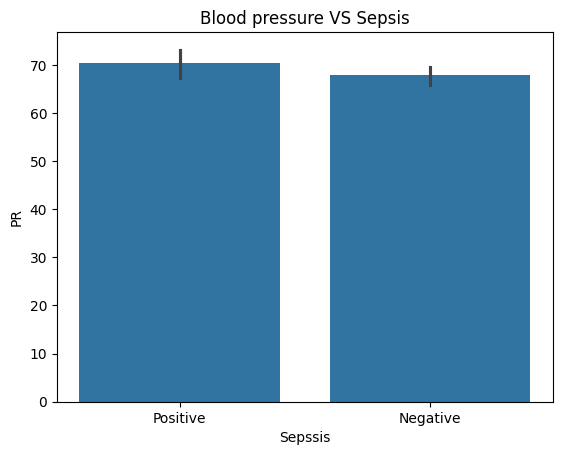

In [ ]:
# How does Blood pressure of the patient affect sepsis
sns.barplot(y=data['PR'],x=data['Sepssis'])
plt.title('Blood pressure VS Sepsis')
plt.plot()

## Hypothesis

In [51]:
from scipy.stats import ttest_ind
import pandas as pd


# Map 'Positive' to 1 and 'Negative' to 0
data['Sepssis'] = data['Sepssis'].map({'1': 1, '0': 0})


# Separate data into sepsis and non-sepsis groups
sepsis_group = data[data['Sepssis'] == 1]['PR']
non_sepsis_group = data[data['Sepssis'] == 0]['PR']

# Perform t-test to check if there is a significant difference in heart rates
t_stat, p_val = ttest_ind(sepsis_group, non_sepsis_group, equal_var=False)  # `equal_var=False` assumes unequal variances

# Print the results
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

# Interpret the results
if p_val < 0.05:
    print("Significant difference: Patients with sepsis have different Blood Pressure compared to non-sepsis patients.")
else:
    print("No significant difference in Blood Pressure between sepsis and non-sepsis patients.")

T-statistic: nan, P-value: nan
No significant difference in Blood Pressure between sepsis and non-sepsis patients.


In [50]:
data['Sepssis'] = data['Sepssis'].astype(object)

## Data preparation

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
X = data.drop(columns=['Sepssis'])
y = data['Sepssis']

In [25]:
#split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
#encode the target variable
lab_encode = LabelEncoder()
y_train_encode = lab_encode.fit_transform(y_train)
y_val_encode = lab_encode.fit_transform(y_val)

In [27]:
#Print the shapes of the splits

print(f'Training set shape:{X_train.shape}')
print(f"Validateion set shape:{X_val.shape}")
print(f'Training set shape: {y_train_encode.shape}')
print(f'Validation set shape:{y_val_encode.shape}')

Training set shape:(419, 9)
Validateion set shape:(180, 9)
Training set shape: (419,)
Validation set shape:(180,)


In [28]:
#number of features
input_features = X.columns
print(input_features)

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')


In [29]:
#Feature preprocessing pipline
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), input_features),
        ('outlier_handler',RobustScaler(), input_features),
        ('scaler',QuantileTransformer(output_distribution='normal',n_quantiles=330),input_features)
    ]
)

In [30]:
#Checking for multicollinearity using Variance Inflation factor(VIF)
vif_data = pd.DataFrame()
vif_data["Feature"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print('variance_inflation_factor(VIF):')
print(vif_data)

variance_inflation_factor(VIF):
     Feature        VIF
0        PRG   3.226812
1         PL  16.216312
2         PR  14.072380
3         SK   3.933874
4         TS   2.035340
5        M11  18.011167
6        BD2   3.224233
7        Age  13.294282
8  Insurance   3.072380


In [31]:
#Select only numeric cols
numeric_data = data.select_dtypes(include=['float64','int64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#Initiialize PCA with the number of components to keep
pca = PCA(n_components=9)

#Fit PCA to the data and transform
principal_comp = pca.fit_transform(scaled_data)

#Create a Dataframe for the principal components
pca_df = pd.DataFrame(data = principal_comp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

explained_variance = pca.explained_variance_ratio_
print(f'Explained Varience Ratio:{explained_variance}')


cumlative_variance = explained_variance.cumsum()
print(f'Explained Varience Ratio:{cumlative_variance}')

Explained Varience Ratio:[0.2313302  0.19066612 0.12146057 0.10854176 0.0932426  0.08437071
 0.07797801 0.04691597 0.04549405]
Explained Varience Ratio:[0.2313302  0.42199632 0.54345689 0.65199865 0.74524125 0.82961197
 0.90758998 0.95450595 1.        ]


In [32]:
#Modelling 
#training the classification model and tune its parameters
#Initialize the model

models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
          }

In [33]:
results_table = pd.DataFrame(columns=['name',"accuracy","precision","recall","f1_Score"])
all_pipelines = {}


for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor",preprocessor),
        ("pca",PCA(n_components=7)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train_encode)

    y_pred = pipeline.predict(X_val)

    metrics = classification_report(y_val_encode, y_pred,output_dict=True)

    all_pipelines[name] = pipeline

    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]['precision']
    recall = metrics["weighted avg"]["recall"]
    f1 = metrics["weighted avg"]["f1-score"]


    results_table.loc[len(results_table)]= [name, accuracy, precision, recall, f1]


results_table = results_table.sort_values('f1_Score',ascending= False)

print('Results:')
print(results_table)

Results:
                  name  accuracy  precision    recall  f1_Score
0  Logistic Regression  0.777778   0.773382  0.777778  0.773918
2        Random Forest  0.766667   0.762222  0.766667  0.755556
1  K-Nearest Neighbors  0.727778   0.720767  0.727778  0.722349


In [34]:
Balanced_table = pd.DataFrame(columns=['name',"accuracy","precision","recall","f1_Score"])
Balanced_pipelines = {}

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encode)

for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ("preprocessor",preprocessor),
        ('smote', SMOTE(random_state= 42)),
        ("pca",PCA(n_components=7)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train_encode)

    y_pred = pipeline.predict(X_val)

    Balanced_metrics = classification_report(y_val_encode, y_pred,output_dict=True)

    Balanced_pipelines[name] = pipeline

    accuracy = Balanced_metrics["accuracy"]
    precision = Balanced_metrics["weighted avg"]['precision']
    recall = Balanced_metrics["weighted avg"]["recall"]
    f1 = Balanced_metrics["weighted avg"]["f1-score"]


    Balanced_table.loc[len(Balanced_table)]= [name, accuracy, precision, recall, f1]


Balanced_table = Balanced_table.sort_values('f1_Score',ascending= False)

print('Results:')
print(Balanced_table)

Results:
                  name  accuracy  precision    recall  f1_Score
0  Logistic Regression  0.750000   0.766447  0.750000  0.754338
2        Random Forest  0.755556   0.752430  0.755556  0.753602
1  K-Nearest Neighbors  0.666667   0.701176  0.666667  0.674146


## Hyperprameter tuning

In [35]:
## Hyperparameter tuning

#Defining the param_grid for each model
param_grid = {
    'Logistic Regression':{
        "model__C": [0.1, 1, 10],
        "model__solver": ['lgfbs','liblinear',]
    },
    'K-Nearest Neighbors':{
        'model__n_neighbors':[3,5,7],
        'model__weights':['uniform',"distance"]
    },
    'Random Forest':{
        'model__n_estimators':[50,100,200],
        'model__max_depth':[None,10,20]
    },
    'LightGBM': {
        'model__num_leaves':[31,50,100],
        'model__learning_rate':[0.1,0.1,0.2]
    }

}

In [36]:
#create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)


# if len(y_train_encode.shape) == 2 and y_train_encode.shape[1] == 1:
#     y_train_encode = y_train_encode.ravel()  # Flatten to 1D
# elif len(y_train_encode.shape) == 0:
#     y_train_encode = np.array([y_train_encode])  # Reshape to 1D

# if len(X_train.shape) == 2 and X_train.shape[1] == 1:
#     X_train= X_train.ravel()  # Flatten to 1D
# elif len(X_train.shape) == 0:
#     X_train = np.array([X_train])  # Reshape to 1D

tuned_models_df = pd.DataFrame(columns=['name','accuracy','precision','recall','f1_Score'])

all_pipelines = {} #to store tuned piplines

for name,model in models.items():
    print(f'Tuning Hyperparameters for :{name}')

    #create the pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])


#Gridsearch cv
    grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid[name],
    cv=skf,
    scoring=['f1_weighted','f1','accuracy','precision','recall'],
    refit='f1_weighted',
    n_jobs=-1
)
    
    

        #Fit the grid search on the training data
    grid_search.fit(X_train,y_train_encode)

    #update the parameters to the pipline
    best_pipline = grid_search.best_estimator_
    all_pipelines[name] = best_pipline

    #predict with the model(#use the validation set)
    y_pred = best_pipline.predict(X_val)

    #store the result
    tuned_metrics = classification_report(y_val_encode,y_pred,output_dict=True)

    #picking values from metrics dict
    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics["weighted avg"]["recall"]
    f1 = tuned_metrics['weighted avg']['f1-score']

    # add the values to the results_table
    tuned_models_df.loc[len(tuned_models_df)]=[name, accuracy, precision, recall, f1]

#sort the table with the f1 score
tuned_models_df.sort_values('f1_Score', ascending=False).reset_index(drop=True)
print('Tuned Results:')
print(tuned_models_df)

Tuning Hyperparameters for :Logistic Regression
Tuning Hyperparameters for :K-Nearest Neighbors
Tuning Hyperparameters for :Random Forest
Tuned Results:
                  name  accuracy  precision    recall  f1_Score
0  Logistic Regression  0.766667   0.761818  0.766667  0.762614
1  K-Nearest Neighbors  0.727778   0.719000  0.727778  0.719283
2        Random Forest  0.761111   0.755198  0.761111  0.755049


In [37]:
#features used in training
print('training features:',preprocessor.get_feature_names_out())

training features: ['imputer__PRG' 'imputer__PL' 'imputer__PR' 'imputer__SK' 'imputer__TS'
 'imputer__M11' 'imputer__BD2' 'imputer__Age' 'imputer__Insurance'
 'outlier_handler__PRG' 'outlier_handler__PL' 'outlier_handler__PR'
 'outlier_handler__SK' 'outlier_handler__TS' 'outlier_handler__M11'
 'outlier_handler__BD2' 'outlier_handler__Age'
 'outlier_handler__Insurance' 'scaler__PRG' 'scaler__PL' 'scaler__PR'
 'scaler__SK' 'scaler__TS' 'scaler__M11' 'scaler__BD2' 'scaler__Age'
 'scaler__Insurance']


In [38]:
#load the testset
test_set = pd.read_csv('data/Paitients_Files_Test.csv')
test_set.head(4)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1


In [39]:
#Initialize predictions dictionary
test_predictions = {}

for name, pipeline in all_pipelines.items():
    print(f'Generating predictions for the Test Set: {name}')
    y_test_pred = pipeline.predict(test_set)
    y_test_prob = pipeline.predict_proba(test_set)[:,1]


    #store pred
    test_predictions[name] ={
        'predictions':y_test_pred,
        'probabilities':y_test_prob
    }

    #Display predictions for each model
    for name, preds in test_predictions.items():
        print(f'Predictions for{name}:')
        print(preds['predictions'])


Generating predictions for the Test Set: Logistic Regression
Predictions forLogistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
Generating predictions for the Test Set: K-Nearest Neighbors
Predictions forLogistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
Predictions forK-Nearest Neighbors:
[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 

In [40]:
#persist the model
for name, pipieline in all_pipelines.items():
    joblib.dump(pipieline,f'models/{name}_pipline.pkl')

In [41]:
#label encoder
joblib.dump(lab_encode,'label_encoder')

test = test_set.drop(columns=['ID'])


In [42]:
test.head(2)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1


In [43]:
test.to_csv("test_utf8.csv", index=False, encoding="utf-8")
